## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [15]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [16]:
train, test = keras.datasets.cifar10.load_data()

In [17]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [18]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
from keras.regularizers import l1_l2

"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with L1 = 0.010000, L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 189us/step - loss: 198.6224 - accuracy: 0.2369 - val_loss: 41.2386 - val_accuracy: 0.2677
Epoch 2/10
50000/50000 [==============================] - 9s 185us/step - loss: 19.1865 - accuracy: 0.1196 - val_loss: 7.3061 - val_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 9s 182us/step - loss: 4.1205 - accuracy: 0.0985 - val_loss: 2.6503 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 9s 181us/step - loss: 2.4866 - accuracy: 0.1004 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 9s 181us/step - loss: 2.4626 - accuracy: 0.0972 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 9s 182us/step - loss: 2.4626 - accuracy: 0.0987 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [==============================] - 

50000/50000 [==============================] - 9s 189us/step - loss: 5.7070 - accuracy: 0.3913 - val_loss: 5.6401 - val_accuracy: 0.4045
Epoch 4/10
50000/50000 [==============================] - 9s 187us/step - loss: 5.5805 - accuracy: 0.4088 - val_loss: 5.5283 - val_accuracy: 0.4155
Epoch 5/10
50000/50000 [==============================] - 9s 187us/step - loss: 5.4621 - accuracy: 0.4274 - val_loss: 5.4298 - val_accuracy: 0.4296
Epoch 6/10
50000/50000 [==============================] - 9s 188us/step - loss: 5.3548 - accuracy: 0.4412 - val_loss: 5.3162 - val_accuracy: 0.4455
Epoch 7/10
50000/50000 [==============================] - 9s 186us/step - loss: 5.2527 - accuracy: 0.4537 - val_loss: 5.2197 - val_accuracy: 0.4512
Epoch 8/10
50000/50000 [==============================] - 9s 186us/step - loss: 5.1571 - accuracy: 0.4634 - val_loss: 5.1309 - val_accuracy: 0.4613
Epoch 9/10
50000/50000 [==============================] - 9s 186us/step - loss: 5.0633 - accuracy: 0.4738 - val_loss: 5.038

Epoch 6/10
50000/50000 [==============================] - 7s 146us/step - loss: 5.2386 - accuracy: 0.4499 - val_loss: 5.2056 - val_accuracy: 0.4469
Epoch 7/10
50000/50000 [==============================] - 7s 147us/step - loss: 5.1435 - accuracy: 0.4600 - val_loss: 5.1295 - val_accuracy: 0.4483
Epoch 8/10
50000/50000 [==============================] - 7s 146us/step - loss: 5.0547 - accuracy: 0.4695 - val_loss: 5.0282 - val_accuracy: 0.4613
Epoch 9/10
50000/50000 [==============================] - 7s 146us/step - loss: 4.9671 - accuracy: 0.4776 - val_loss: 4.9540 - val_accuracy: 0.4682
Epoch 10/10
50000/50000 [==============================] - 7s 147us/step - loss: 4.8835 - accuracy: 0.4865 - val_loss: 4.8752 - val_accuracy: 0.4732
Experiment with L1 = 0.000000, L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         

Epoch 9/10
50000/50000 [==============================] - 8s 168us/step - loss: 1.4684 - accuracy: 0.4866 - val_loss: 1.4830 - val_accuracy: 0.4752
Epoch 10/10
50000/50000 [==============================] - 8s 166us/step - loss: 1.4427 - accuracy: 0.4935 - val_loss: 1.4802 - val_accuracy: 0.4749
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 173us/step - loss: 2.1769 - accuracy: 0.2726 - val_loss: 2.0156 - val_accuracy: 0.3470
Epoch 2/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.9483 - accuracy: 0.3682 - val_loss: 1.9080 - val_accuracy: 0.3802
Epoch 3/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.8690 - accuracy: 0.3933 - val_loss: 1.8411 - val_accuracy: 0.4020
Epoch 4/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.8129 - accuracy: 0.4149 - val_loss: 1.7886 - val_accuracy: 0.4206
Epoch 5/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.7674 - accuracy: 0.4280 - val_loss: 1.7484 - val_accuracy: 0.4335
Epoch 6/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.7274 - accuracy: 0.4447 - val_loss: 1.7197 - val_accuracy: 0.4476
Epoch 7/10
50000/50000 [==============================] - 8s 1

50000/50000 [==============================] - 7s 145us/step - loss: 1.7321 - accuracy: 0.3924 - val_loss: 1.6983 - val_accuracy: 0.4029
Epoch 4/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.6756 - accuracy: 0.4114 - val_loss: 1.6705 - val_accuracy: 0.4114
Epoch 5/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.6296 - accuracy: 0.4274 - val_loss: 1.6185 - val_accuracy: 0.4286
Epoch 6/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.5899 - accuracy: 0.4420 - val_loss: 1.5847 - val_accuracy: 0.4389
Epoch 7/10
50000/50000 [==============================] - 7s 146us/step - loss: 1.5551 - accuracy: 0.4555 - val_loss: 1.5520 - val_accuracy: 0.4527
Epoch 8/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.5243 - accuracy: 0.4658 - val_loss: 1.5305 - val_accuracy: 0.4559
Epoch 9/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.4957 - accuracy: 0.4755 - val_loss: 1.504

Epoch 6/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.5741 - accuracy: 0.4468 - val_loss: 1.5705 - val_accuracy: 0.4432
Epoch 7/10
50000/50000 [==============================] - 7s 146us/step - loss: 1.5402 - accuracy: 0.4600 - val_loss: 1.5568 - val_accuracy: 0.4497
Epoch 8/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.5114 - accuracy: 0.4698 - val_loss: 1.5212 - val_accuracy: 0.4623
Epoch 9/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.4837 - accuracy: 0.4802 - val_loss: 1.5173 - val_accuracy: 0.4596
Epoch 10/10
50000/50000 [==============================] - 7s 145us/step - loss: 1.4604 - accuracy: 0.4873 - val_loss: 1.4882 - val_accuracy: 0.4728
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         

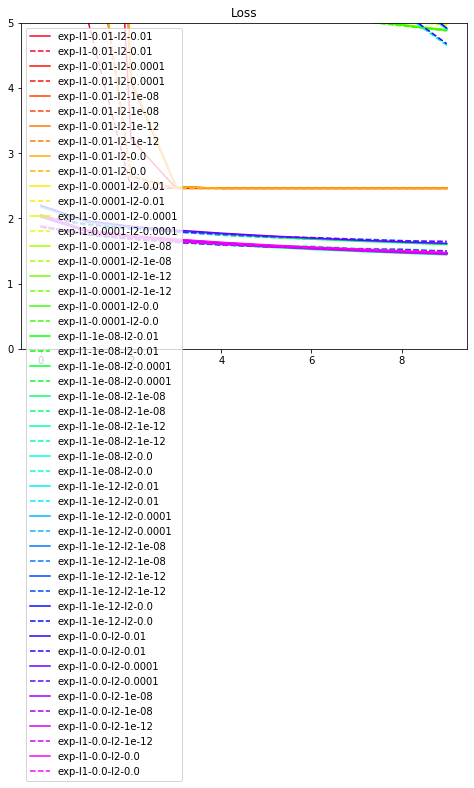

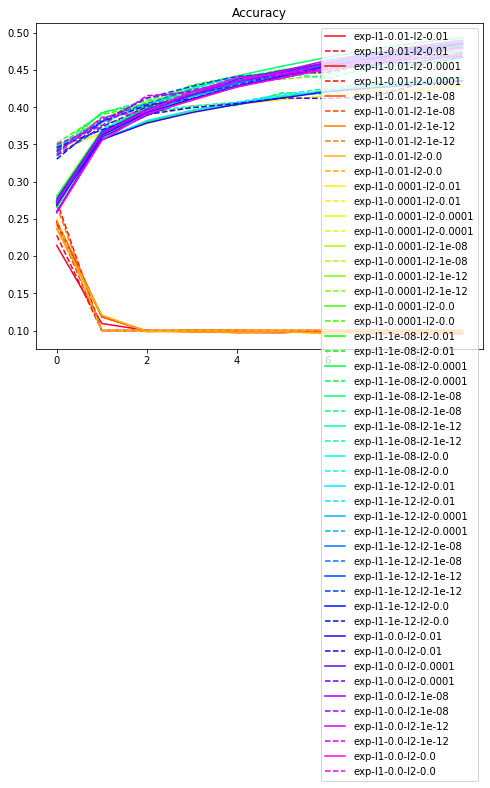

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

#NUM_COLORS = 25
#cm = plt.get_cmap('gist_rainbow')
#cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
#scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
#color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]


NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]



plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()